<a href="https://colab.research.google.com/github/yrlmzmerve/Open_CV_Tutorial/blob/main/Fatura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Fatura için Open CV

In [34]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

(1754, 1240)


(<Figure size 432x288 with 1 Axes>,
 (-0.5, 1239.5, 1753.5, -0.5))

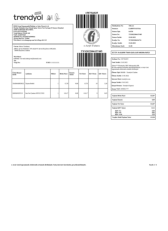

In [35]:
# resmi içe aktar
img = cv2.imread("fatura1.jpg", 0)
img = np.float32(img)
print(img.shape)
plt.figure(), plt.imshow(img, cmap = "gray"), plt.axis("off")

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 1239.5, 1753.5, -0.5))

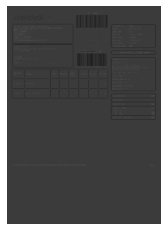

In [36]:
# harris corner detection
dst = cv2.cornerHarris(img, blockSize = 2, ksize = 3, k = 0.04)
plt.figure(), plt.imshow(dst, cmap = "gray"), plt.axis("off")

In [38]:
from PIL import Image
im = Image.fromarray(dst)
im.save("dst.jpg")

OSError: ignored

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 1239.5, 1753.5, -0.5))

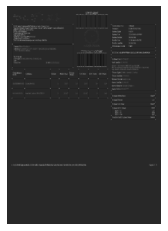

In [39]:
dst = cv2.dilate(dst, None)
img[dst>0.2*dst.max()] = 1
plt.figure(), plt.imshow(dst, cmap = "gray"), plt.axis("off")

In [40]:
from PIL import Image
im = Image.fromarray(dst)
im.save("dst.jpg")

OSError: ignored

In [5]:
# shi tomasi detection
img = cv2.imread("fatura1.jpg", 0)
img = np.float32(img)
corners = cv2.goodFeaturesToTrack(img, 120, 0.01, 10)
corners = np.int64(corners)

(-0.5, 1239.5, 1753.5, -0.5)

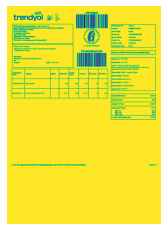

In [6]:
for i in corners:
    x,y = i.ravel()
    cv2.circle(img, (x,y),3,(125,125,125),cv2.FILLED)
    
plt.imshow(img)
plt.axis("off")

## Özellik Eşleştirme

In [7]:
from google. colab import files

In [8]:
import cv2
import matplotlib.pyplot as plt

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 1239.5, 1753.5, -0.5))

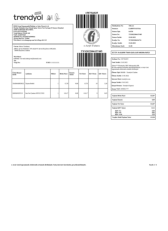

In [9]:
# ana görüntüyü içe aktar
chos = cv2.imread("fatura1.jpg", 0)
plt.figure(), plt.imshow(chos, cmap = "gray"),plt.axis("off")

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 499.5, 193.5, -0.5))

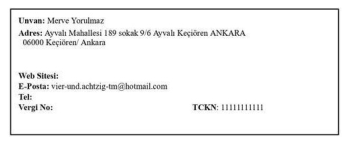

In [11]:
# aranacak olan görüntü
cho = cv2.imread("fatura1_customer_detail.jpg", 0)
plt.figure(), plt.imshow(cho, cmap = "gray"),plt.axis("off")

In [12]:
# orb tanımlayıcı
# köşe-kenar gbi nesneye ait özellikler
orb = cv2.ORB_create()

In [13]:
# anahtar nokta tespiti
kp1, des1 = orb.detectAndCompute(cho, None)
kp2, des2 = orb.detectAndCompute(chos, None)

In [14]:
# bf matcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING)
# noktaları eşleştir
matches = bf.match(des1, des2)

In [15]:
# mesafeye göre sırala
matches = sorted(matches, key = lambda x: x.distance)

(<matplotlib.image.AxesImage at 0x7f8438475390>,
 (-0.5, 1739.5, 1753.5, -0.5),
 Text(0.5, 1.0, 'orb'))

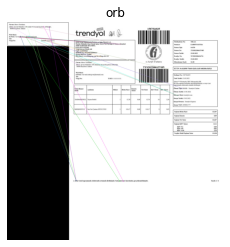

In [16]:
# eşleşen resimleri görselleştirme

# tüm fatura ile customer detail

plt.figure()
img_match = cv2.drawMatches(cho, kp1, chos, kp2, matches[:20], None, flags = 2)
plt.imshow(img_match), plt.axis("off"),plt.title("orb")

In [24]:
type(img_match)
from PIL import Image
im = Image.fromarray(img_match)
im.save("ayırma_customerDetail_.jpeg")

Tüm fatura ile total kısım

In [26]:
import cv2
import matplotlib.pyplot as plt

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 1239.5, 1753.5, -0.5))

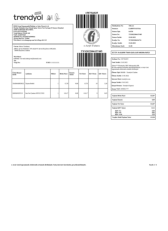

In [27]:
# ana görüntüyü içe aktar
chos = cv2.imread("fatura1.jpg", 0)
plt.figure(), plt.imshow(chos, cmap = "gray"),plt.axis("off")

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 367.5, 215.5, -0.5))

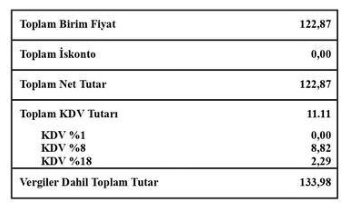

In [28]:
# aranacak olan görüntü
cho = cv2.imread("fatura1_product_table_total.jpg", 0)
plt.figure(), plt.imshow(cho, cmap = "gray"),plt.axis("off")

In [29]:
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(cho, None)
kp2, des2 = orb.detectAndCompute(chos, None)

In [30]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING)
matches = bf.match(des1, des2)
matches = sorted(matches, key = lambda x: x.distance)

(<matplotlib.image.AxesImage at 0x7f84381f86d0>,
 (-0.5, 1607.5, 1753.5, -0.5),
 Text(0.5, 1.0, 'orb'))

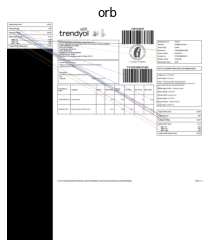

In [31]:
plt.figure()
img_match = cv2.drawMatches(cho, kp1, chos, kp2, matches[:20], None, flags = 2)
plt.imshow(img_match), plt.axis("off"),plt.title("orb")

In [32]:
from PIL import Image
im = Image.fromarray(img_match)
im.save("profuc_total.jpeg")

## Şablon

Soldan sağa tarama

In [41]:
import cv2
import matplotlib.pyplot as plt

In [43]:
img = cv2.imread("fatura1.jpg", 0)
print(img.shape)
template = cv2.imread("fatura1_product_table_total.jpg", 0)
print(template.shape)
h, w = template.shape

(1754, 1240)
(216, 368)


In [44]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']


(1539, 873)


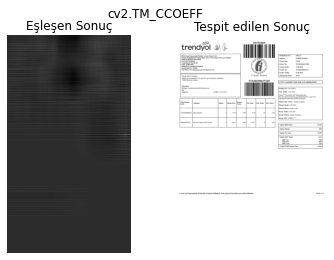

(1539, 873)


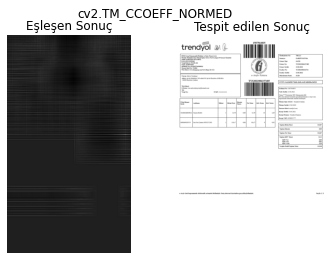

(1539, 873)


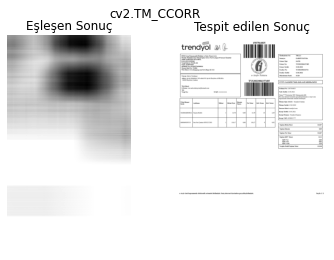

(1539, 873)


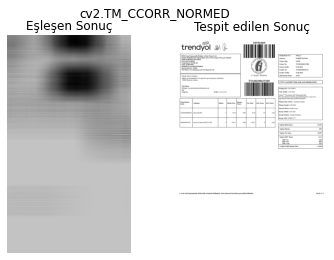

(1539, 873)


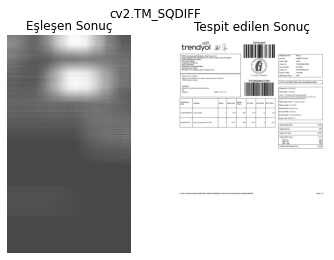

(1539, 873)


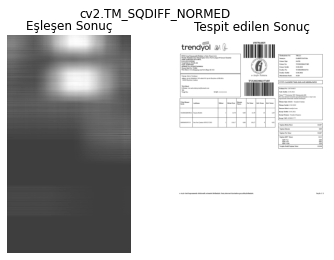

In [45]:
for meth in methods:
    
    method = eval(meth) # 'cv2.TM_CCOEFF' -> cv2.TM_CCOEFF
    
    res = cv2.matchTemplate(img, template, method)
    print(res.shape)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    
    bottom_right = (top_left[0] + w, top_left[1] + h)
    
    cv2.rectangle(img, top_left, bottom_right, 255, 2)
    
    plt.figure()
    plt.subplot(121), plt.imshow(res, cmap = "gray")
    plt.title("Eşleşen Sonuç"), plt.axis("off")
    plt.subplot(122), plt.imshow(img, cmap = "gray")
    plt.title("Tespit edilen Sonuç"), plt.axis("off")
    plt.suptitle(meth)
    
    plt.show()
    

### Havza Algoritması

Görüntüdeki farklı nesneleri ayırmada kullanılır

In [54]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 1239.5, 1753.5, -0.5))

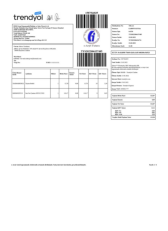

In [55]:
# içe aktar
coin = cv2.imread("fatura1.jpg")
plt.figure(), plt.imshow(coin), plt.axis("off")

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 1239.5, 1753.5, -0.5))

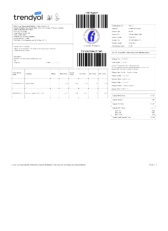

In [61]:
# lpf: blurring
coin_blur = cv2.medianBlur(coin, 5)
plt.figure(), plt.imshow(coin_blur), plt.axis("off")

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 1239.5, 1753.5, -0.5))

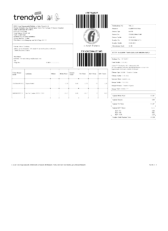

In [62]:
# grayscale
coin_gray = cv2.cvtColor(coin_blur, cv2.COLOR_BGR2GRAY)
plt.figure(), plt.imshow(coin_gray, cmap="gray"), plt.axis("off")

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 1239.5, 1753.5, -0.5))

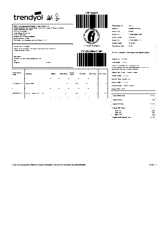

In [68]:
# binary threshold
ret, coin_thresh = cv2.threshold(coin_gray, 210, 248, cv2.THRESH_BINARY)
plt.figure(), plt.imshow(coin_thresh, cmap="gray"), plt.axis("off")

In [69]:
# kontur
# _, contours, hierarchy = cv2.findContours(coin_thresh.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
contours, hierarchy = cv2.findContours(coin_thresh.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 1239.5, 1753.5, -0.5))

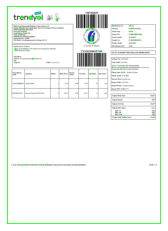

In [70]:
contours, hierarchy = cv2.findContours(coin_thresh.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(coin, contours,i,(0,255,0),10)
plt.figure(),plt.imshow(coin),plt.axis("off")

In [71]:
from PIL import Image
im = Image.fromarray(coin)
im.save("havz_.jpeg")

yakalayamadı düzeltmeye çalışalım

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 1239.5, 1753.5, -0.5))

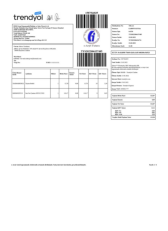

In [72]:
# watershed

# içe aktar
coin = cv2.imread("fatura1.jpg")
plt.figure(), plt.imshow(coin), plt.axis("off")

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 1239.5, 1753.5, -0.5))

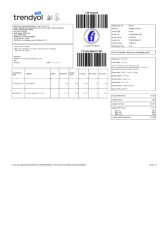

In [74]:
# lpf: blurring
coin_blur = cv2.medianBlur(coin, 3)
plt.figure(), plt.imshow(coin_blur), plt.axis("off")

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 1239.5, 1753.5, -0.5))

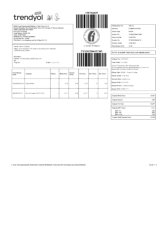

In [75]:
# grayscale
coin_gray = cv2.cvtColor(coin_blur, cv2.COLOR_BGR2GRAY)
plt.figure(), plt.imshow(coin_gray, cmap="gray"), plt.axis("off")

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 1239.5, 1753.5, -0.5))

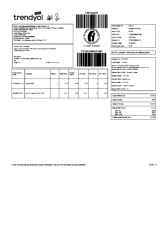

In [77]:
# binary threshold
ret, coin_thresh = cv2.threshold(coin_gray, 202, 255, cv2.THRESH_BINARY)
plt.figure(), plt.imshow(coin_thresh, cmap="gray"), plt.axis("off")

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 1239.5, 1753.5, -0.5))

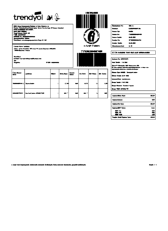

In [78]:
# açılma
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(coin_thresh, cv2.MORPH_OPEN, kernel, iterations = 2)
plt.figure(), plt.imshow(opening, cmap="gray"), plt.axis("off")

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 1239.5, 1753.5, -0.5))

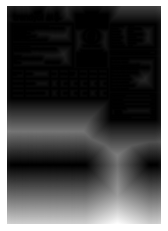

In [81]:
# nesneler arası distance bulalım
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 3)
plt.figure(), plt.imshow(dist_transform, cmap="gray"), plt.axis("off")


(<Figure size 432x288 with 1 Axes>,
 (-0.5, 1239.5, 1753.5, -0.5))

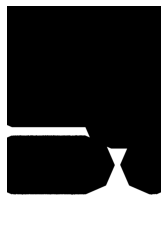

In [82]:
# resmi küçült
ret, sure_foreground = cv2.threshold(dist_transform, 0.4*np.max(dist_transform),255,0)
plt.figure(), plt.imshow(sure_foreground, cmap="gray"), plt.axis("off")


(<Figure size 432x288 with 1 Axes>,
 (-0.5, 1239.5, 1753.5, -0.5))

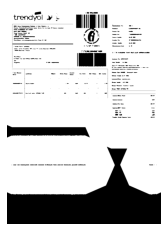

In [83]:
# arka plan için resmi büyült
sure_background = cv2.dilate(opening, kernel, iterations = 1)
sure_foreground = np.uint8(sure_foreground)
unknown = cv2.subtract(sure_background,sure_foreground)
plt.figure(), plt.imshow(unknown, cmap="gray"), plt.axis("off")


(<Figure size 432x288 with 1 Axes>,
 (-0.5, 1239.5, 1753.5, -0.5))

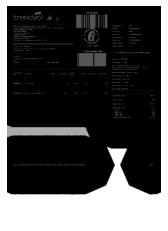

In [84]:
# bağlantı
ret, marker = cv2.connectedComponents(sure_foreground)
marker = marker + 1
marker[unknown == 255] = 0
plt.figure(), plt.imshow(marker, cmap="gray"), plt.axis("off")


(<Figure size 432x288 with 1 Axes>,
 (-0.5, 1239.5, 1753.5, -0.5))

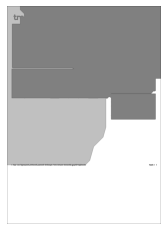

In [85]:
# havza
marker = cv2.watershed(coin,marker)
plt.figure(), plt.imshow(marker, cmap="gray"), plt.axis("off")


In [86]:
# kontur
# _, contours, hierarchy = cv2.findContours(coin_thresh.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
contours, hierarchy = cv2.findContours(marker.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)


(<Figure size 432x288 with 1 Axes>,
 (-0.5, 1239.5, 1753.5, -0.5))

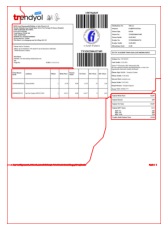

In [87]:
for i in range(len(contours)):
    
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(coin, contours,i,(255,0,0),2)
plt.figure(),plt.imshow(coin),plt.axis("off")